In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('df_x_classified.csv')

In [9]:
df.loc[df['PEOPLE'] > 1, 'PEOPLE'] = 1
df.loc[df['PUBLICITY'] > 1, 'PUBLICITY'] = 1

In [10]:
df.describe()

,id,likes,PRODUCT,PLACE,PRICE,PUBLICITY,POSTCONSUMPTION,PURPOSE,PARTNERSHIPS,PEOPLE,PLANET
count,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.814385e+18,324.016667,0.925000,0.316667,0.100000,0.566667,0.183333,0.116667,0.125000,0.408333,0.058333
std,2.493864e+17,2131.344772,0.264496,0.467127,0.301258,0.497613,0.388562,0.322369,0.332106,0.493586,0.235355
min,1.016325e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.900366e+18,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.902106e+18,6.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.902850e+18,21.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.902948e+18,23052.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 9Ps Framework Analysis: Understanding Brand Perceptions Through Tweet Classification

Now that you have tweets classified into these nine categories (the 9Ps framework), you have several interesting analytical possibilities. Here are some ways you could analyze this data:

## Basic Analysis

### Frequency Analysis
- Count how many tweets mention each category
- Create distribution charts showing which aspects of the brand are most discussed
- Track how these frequencies change over time to spot trends

### Co-occurrence Analysis
- Create a correlation matrix to see which categories frequently appear together
- For example, do people who talk about PRICE also tend to mention PRODUCT quality?

### Sentiment Analysis
- Add sentiment analysis to see if mentions of each category are mostly positive or negative
- For example, are tweets about PLANET (sustainability) mostly positive while tweets about PRICE are negative?

## Advanced Analysis

### Customer Feedback Segmentation
- Group tweets by the combinations of categories they mention to identify distinct feedback types
- Example: "Product quality complaints" vs. "Sustainability praise" vs. "Price concerns"

### Competitive Analysis
- Compare classification results across different brands in the same industry
- Are competitors receiving more attention in certain categories?

### Customer Journey Mapping
- Analyze how different categories appear at different stages (awareness, consideration, purchase, post-purchase)
- POSTCONSUMPTION tweets might indicate customer experience issues

### Brand Perception Gap Analysis
- Compare what the brand promotes (e.g., through their marketing) vs. what customers discuss
- Is the brand investing in PURPOSE while customers only talk about PRICE?

### Category-specific Word Clouds
- Generate word clouds for tweets in each category to understand specific themes

## Business Applications

### Marketing Strategy Refinement
- Identify underrepresented positive attributes in customer discussions
- Find opportunities to amplify positive categories in marketing

### Product Development Input
- Use PRODUCT and POSTCONSUMPTION feedback for product improvement
- Identify features customers care about most

### Crisis Management
- Monitor sudden spikes in specific categories (especially with negative sentiment)
- Track PEOPLE issues that might indicate PR problems

### Competitive Positioning
- Understand your strengths in customer discussions compared to competitors
- Identify white space in the market

### ESG Reporting
- Track mentions of PLANET and PEOPLE to gauge public perception of sustainability efforts
- Use as supplementary data for sustainability reports

## Visualization Ideas
- Radar Charts - Show coverage across all 9Ps for your brand vs. competitors
- Heatmaps - Show which categories co-occur most frequently
- Time Series - Track category mentions over time
- Sentiment Distribution - Bar charts showing positive/negative sentiment in each category
- Network Diagrams - Show relationships between categories and specific topics


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [12]:
# Assuming df is your DataFrame with all the categorized tweets
# Let's first create a mock dataset with timestamps for demonstration
# In a real scenario, you would use your actual classified DataFrame

# Define all categories
CATEGORIES = [
    'PRODUCT', 'PLACE', 'PRICE', 'PUBLICITY', 
    'POSTCONSUMPTION', 'PURPOSE', 'PARTNERSHIPS', 
    'PEOPLE', 'PLANET'
]

# Create a sample DataFrame with timestamps (for time series analysis)
# In your case, you'll need to ensure your real dataframe has a 'timestamp' column
np.random.seed(42)  # For reproducibility
n_samples = 200

# Generate random dates over the last 30 days
base_date = datetime.now() - timedelta(days=30)
random_days = np.random.randint(0, 30, n_samples)
dates = [base_date + timedelta(days=int(day)) for day in random_days]

# Create the sample DataFrame
sample_data = {
    'id': range(1, n_samples + 1),
    'tweet': [f"Sample tweet {i}" for i in range(1, n_samples + 1)],
    'timestamp': dates
}

# Add categories with random binary values (0 or 1)
# In real data, these would be your classification results
for category in CATEGORIES:
    # Biasing some categories to be more frequent than others for realistic distribution
    if category in ["PRODUCT", "PRICE"]:
        prob = 0.4  # 40% chance of being mentioned
    elif category in ["PLACE", "PUBLICITY"]:
        prob = 0.3  # 30% chance of being mentioned
    else:
        prob = 0.15  # 15% chance for other categories
        
    sample_data[category] = np.random.choice([0, 1], size=n_samples, p=[1-prob, prob])

# Create the DataFrame
df = pd.DataFrame(sample_data)

# Convert timestamp to datetime if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date  # Extract date for daily aggregation

# Now let's implement the frequency analysis

# 1. Count mentions of each category
def count_category_mentions(dataframe):
    """Count how many tweets mention each category"""
    # Calculate counts and percentages
    category_counts = {}
    total_tweets = len(dataframe)
    
    for category in CATEGORIES:
        count = dataframe[category].sum()
        percentage = (count / total_tweets) * 100
        category_counts[category] = {
            'count': count,
            'percentage': percentage
        }
    
    # Convert to DataFrame for better display
    counts_df = pd.DataFrame.from_dict(category_counts, orient='index')
    counts_df = counts_df.sort_values('count', ascending=False)
    
    return counts_df

# 2. Create distribution charts
def plot_category_distribution(counts_df):
    """Create bar charts showing distribution of categories"""
    plt.figure(figsize=(12, 6))
    
    # Create bar chart of counts
    plt.subplot(1, 2, 1)
    sns.barplot(x=counts_df.index, y='count', data=counts_df)
    plt.title('Number of Tweets by Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)
    
    # Create bar chart of percentages
    plt.subplot(1, 2, 2)
    sns.barplot(x=counts_df.index, y='percentage', data=counts_df)
    plt.title('Percentage of Tweets by Category')
    plt.xlabel('Category')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# 3. Track trends over time
def plot_category_trends(dataframe, freq='D'):
    """
    Plot how categories change over time
    freq: Time frequency ('D' for daily, 'W' for weekly, 'M' for monthly)
    """
    # Group by date and sum categories
    if freq == 'D':
        # Daily aggregation
        time_series = dataframe.groupby('date')[CATEGORIES].sum()
    else:
        # Weekly or monthly aggregation
        time_series = dataframe.groupby(pd.Grouper(key='timestamp', freq=freq))[CATEGORIES].sum()
    
    # Plot time series for each category
    plt.figure(figsize=(14, 8))
    
    # Line plot for each category
    for category in CATEGORIES:
        plt.plot(time_series.index, time_series[category], label=category)
    
    plt.title(f'Category Mentions Over Time ({freq})')
    plt.xlabel('Date')
    plt.ylabel('Number of Mentions')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    
    # Format x-axis based on frequency
    if freq == 'D':
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
    elif freq == 'W':
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    else:  # Monthly
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Create a stacked area chart to show relative proportions over time
def plot_stacked_area_trends(dataframe, freq='W'):
    """
    Create a stacked area chart showing relative proportions of categories over time
    freq: Time frequency ('D' for daily, 'W' for weekly, 'M' for monthly)
    """
    # Group by time period
    if freq == 'D':
        # Daily aggregation
        time_series = dataframe.groupby('date')[CATEGORIES].sum()
    else:
        # Weekly or monthly aggregation
        time_series = dataframe.groupby(pd.Grouper(key='timestamp', freq=freq))[CATEGORIES].sum()
    
    # Create stacked area chart
    plt.figure(figsize=(14, 8))
    plt.stackplot(time_series.index, 
                  [time_series[cat] for cat in CATEGORIES],
                  labels=CATEGORIES, alpha=0.8)
    
    plt.title(f'Relative Proportion of Categories Over Time ({freq})')
    plt.xlabel('Date')
    plt.ylabel('Number of Mentions')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # Format x-axis based on frequency
    if freq == 'D':
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
    elif freq == 'W':
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    else:  # Monthly
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Create a heatmap showing daily activity patterns
def plot_daily_heatmap(dataframe):
    """Create a heatmap showing daily activity patterns for each category"""
    # Extract day of week and hour of day
    dataframe['day_of_week'] = dataframe['timestamp'].dt.day_name()
    dataframe['hour_of_day'] = dataframe['timestamp'].dt.hour
    
    # Define order of days
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # For each category, create a heatmap
    for category in CATEGORIES:
        # Filter tweets that mention this category
        category_tweets = dataframe[dataframe[category] == 1]
        
        # Create a pivot table for the heatmap
        heatmap_data = pd.pivot_table(
            category_tweets,
            values=category,
            index='day_of_week',
            columns='hour_of_day',
            aggfunc='count',
            fill_value=0
        )
        
        # Reorder the days
        heatmap_data = heatmap_data.reindex(days_order)
        
        # Plot the heatmap
        plt.figure(figsize=(12, 6))
        sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Tweets'})
        plt.title(f'Daily Pattern of {category} Mentions')
        plt.xlabel('Hour of Day')
        plt.ylabel('Day of Week')
        plt.tight_layout()
        plt.show()

Category Counts:
                 count  percentage
PRICE               75        37.5
PRODUCT             73        36.5
PUBLICITY           66        33.0
PLACE               56        28.0
PURPOSE             41        20.5
POSTCONSUMPTION     28        14.0
PLANET              26        13.0
PARTNERSHIPS        24        12.0
PEOPLE              23        11.5


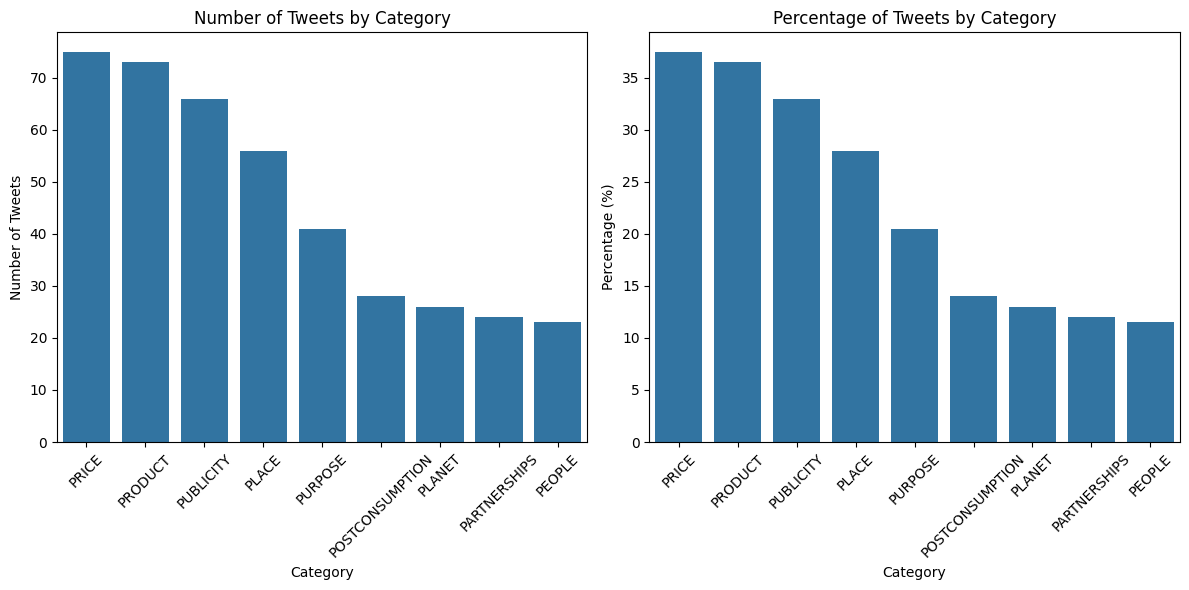

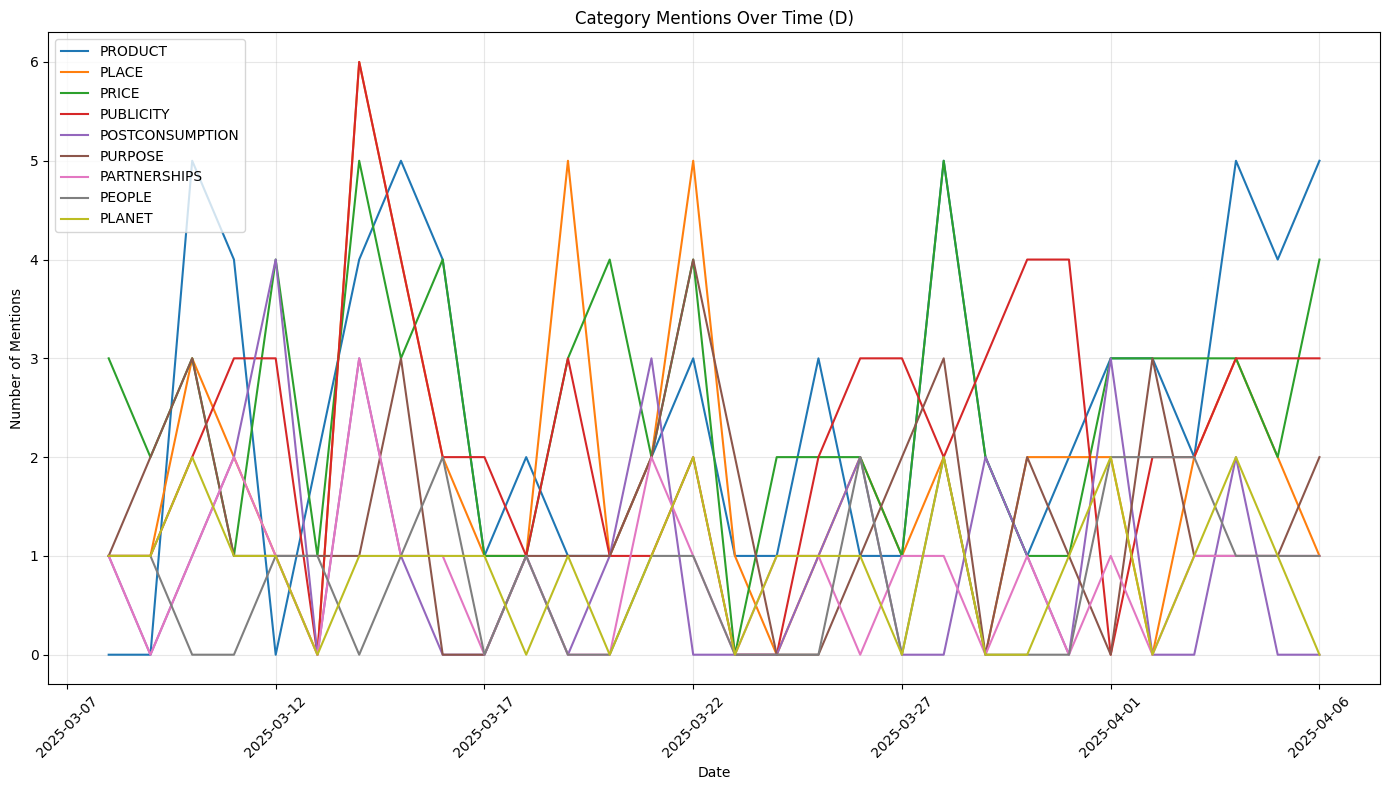

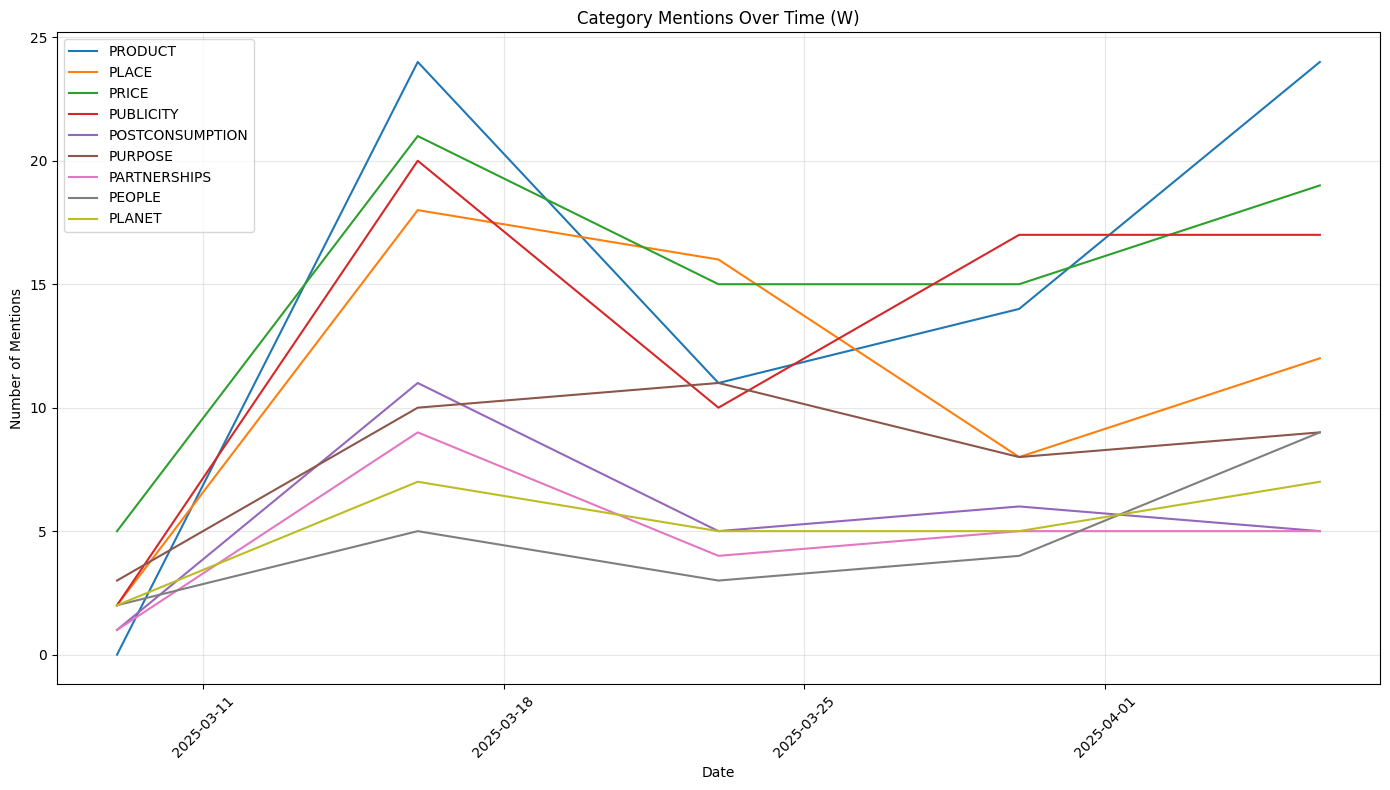

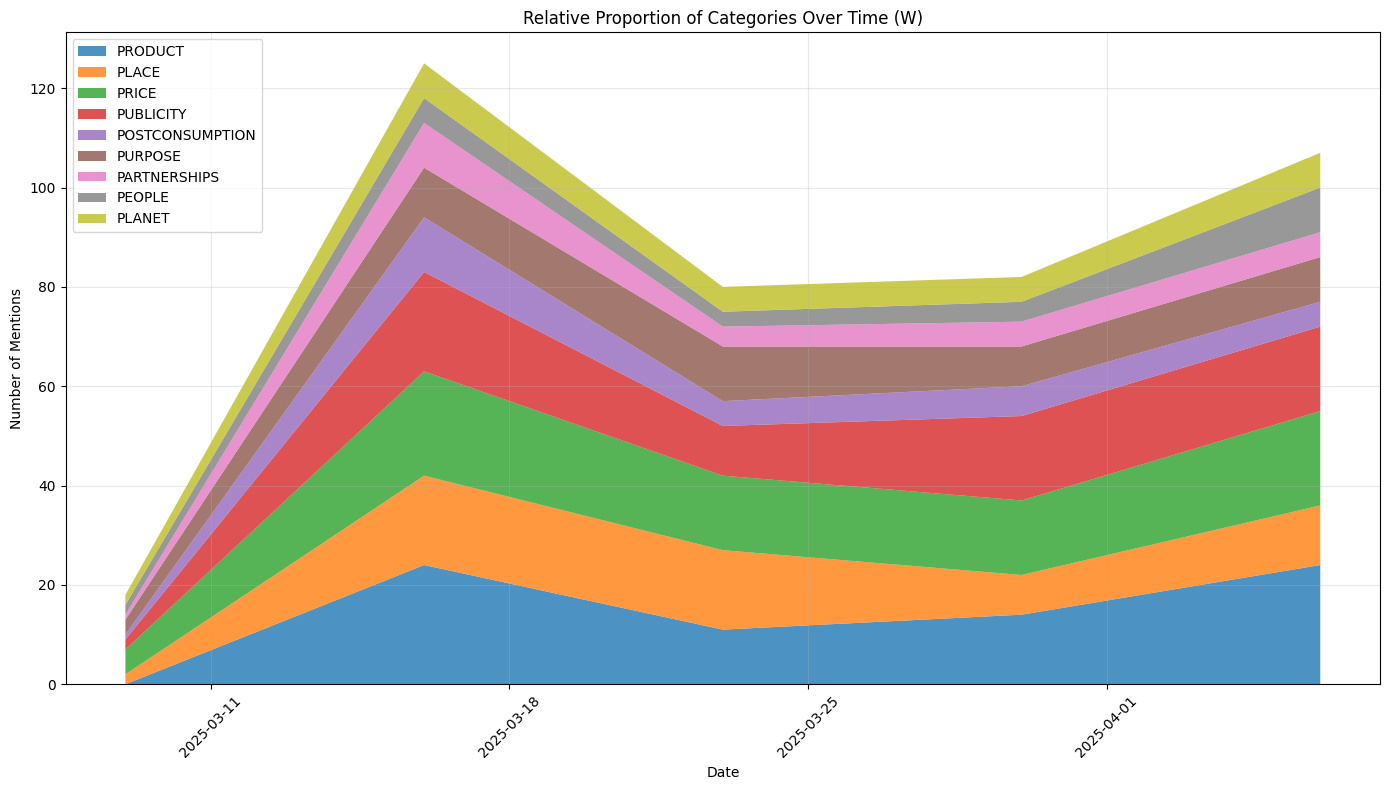

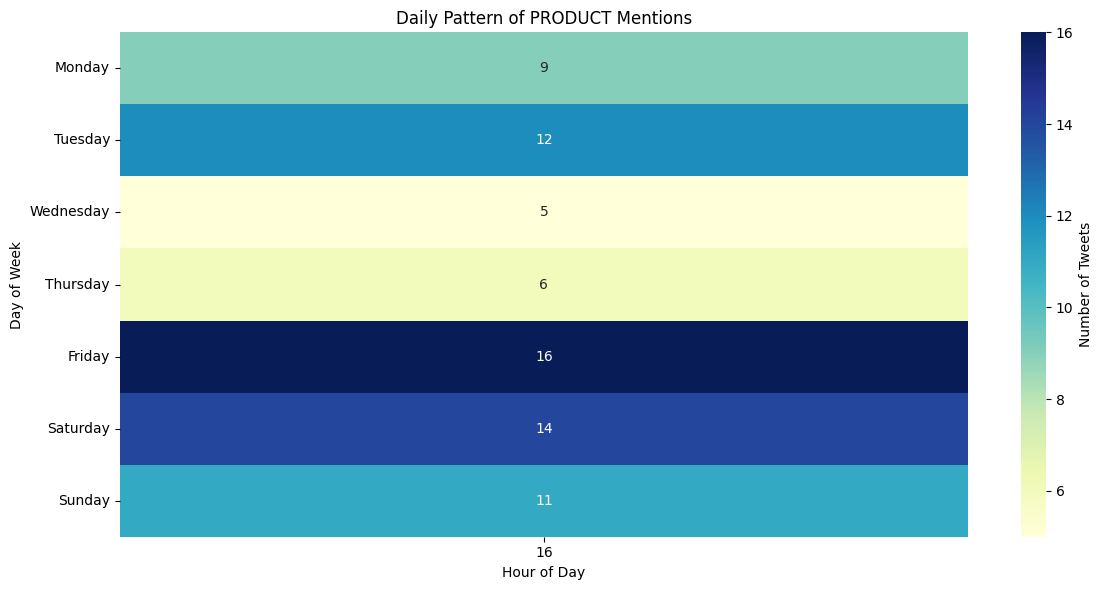

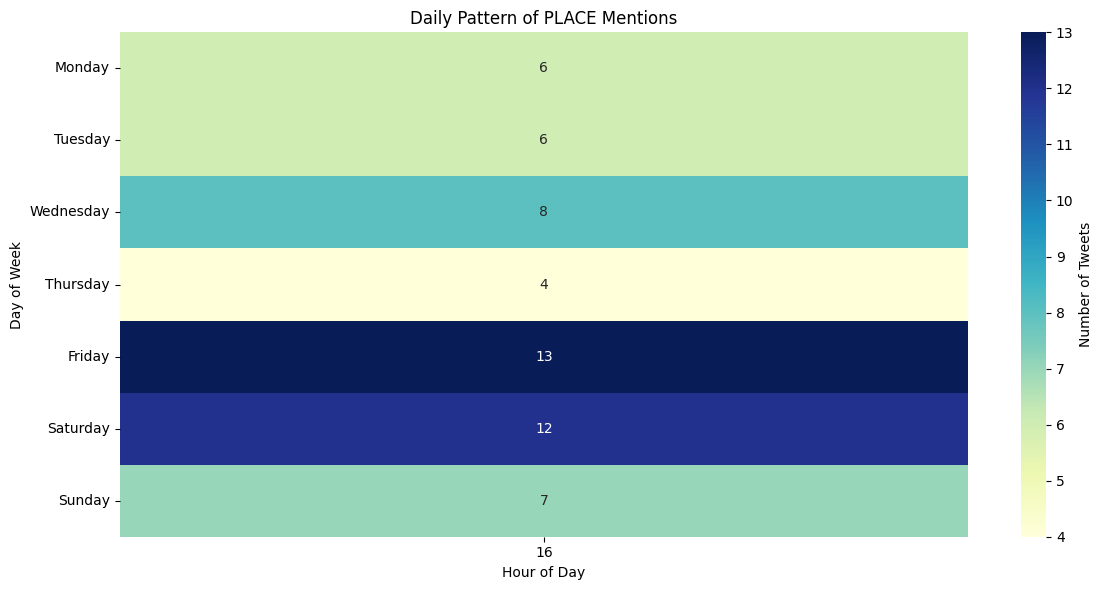

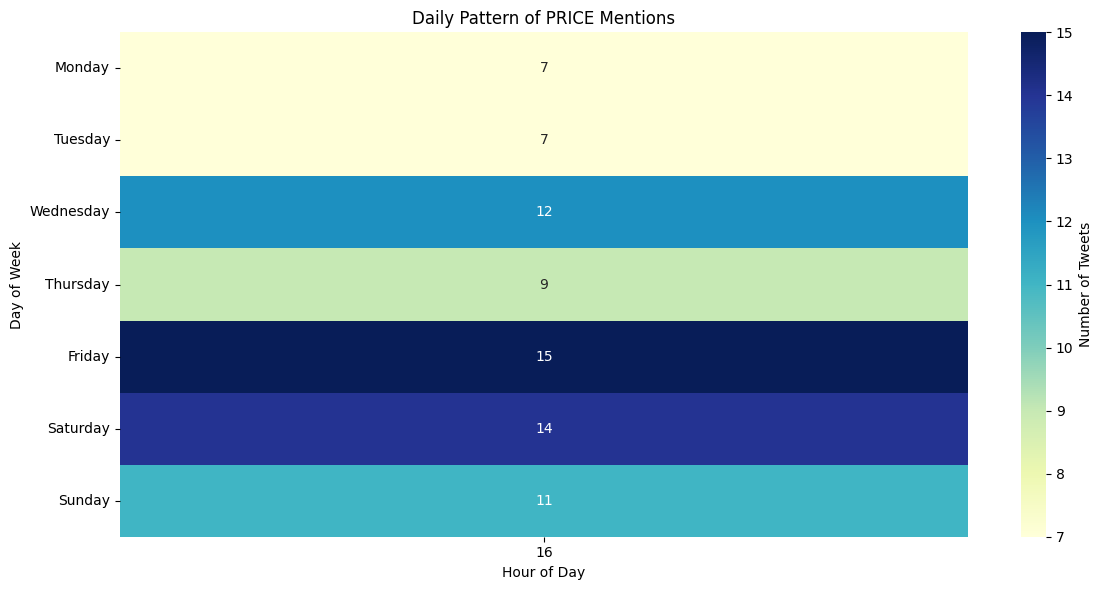

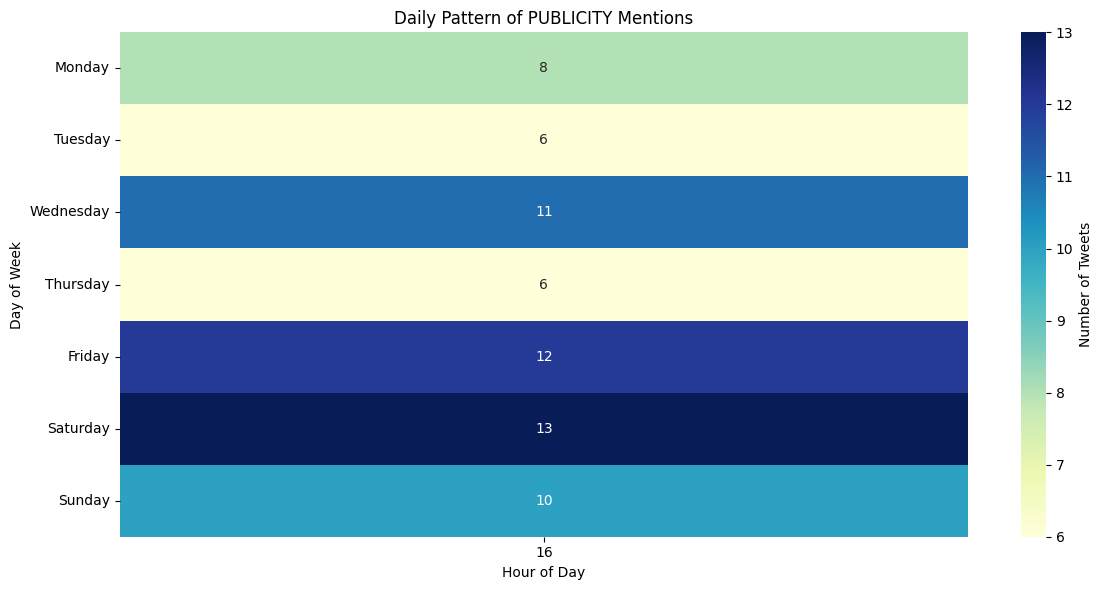

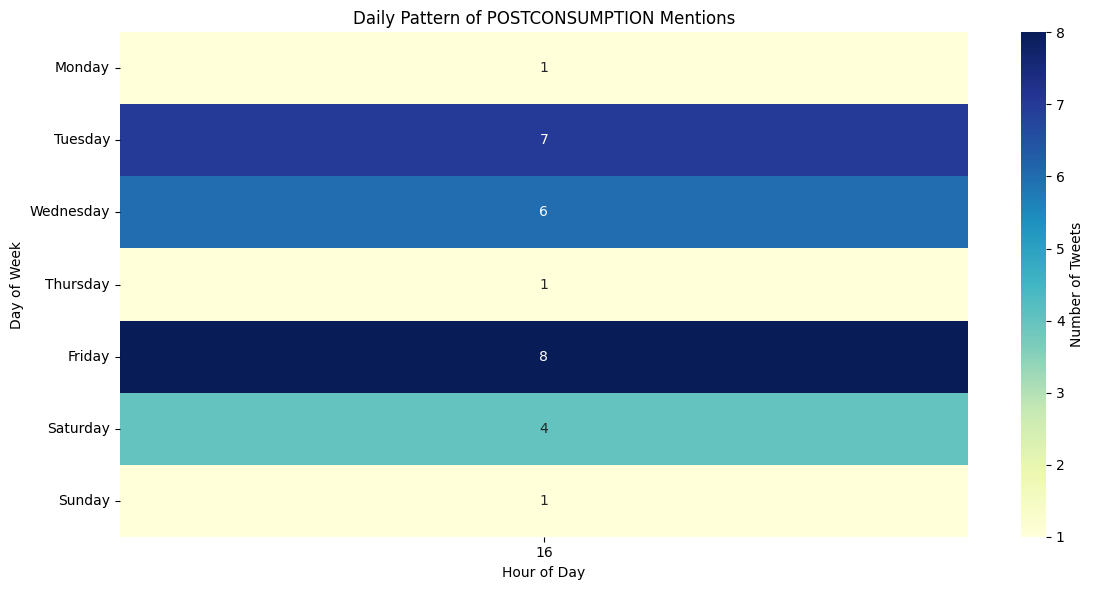

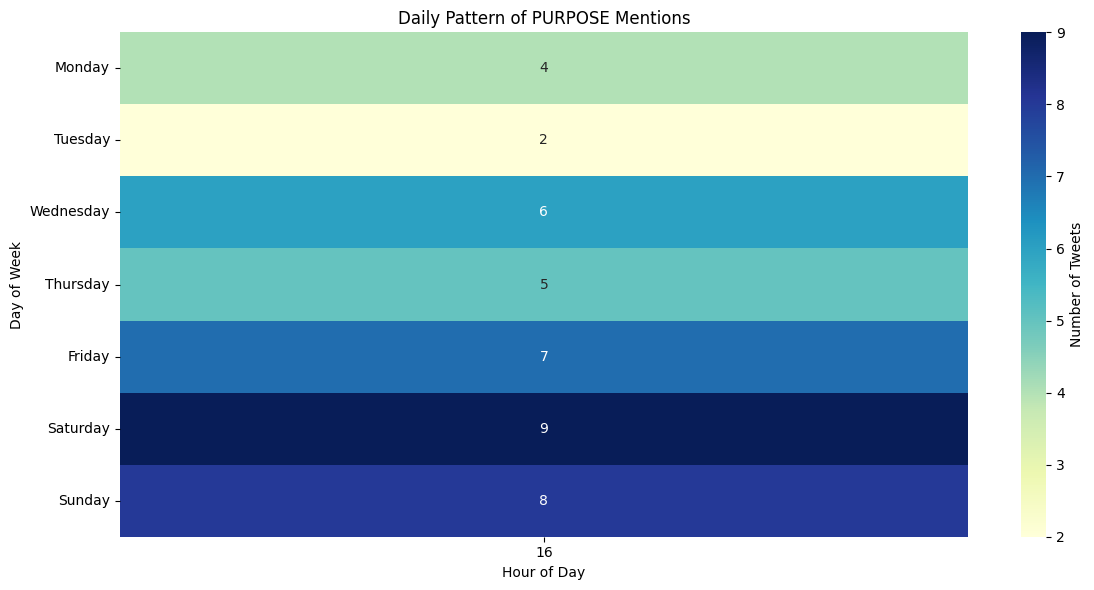

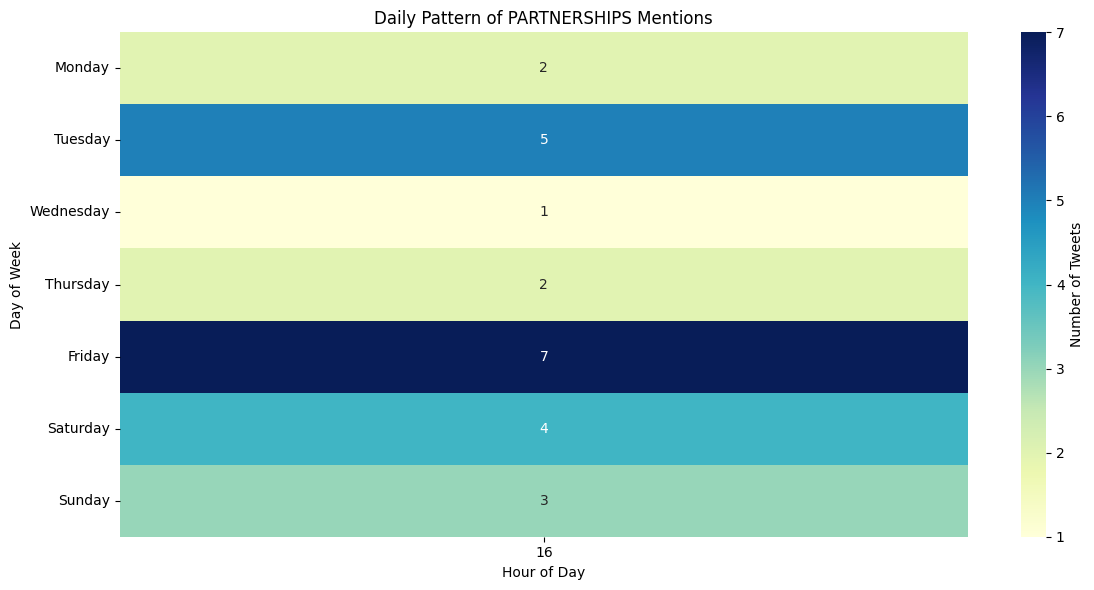

ValueError: Unknown format code 'd' for object of type 'float'

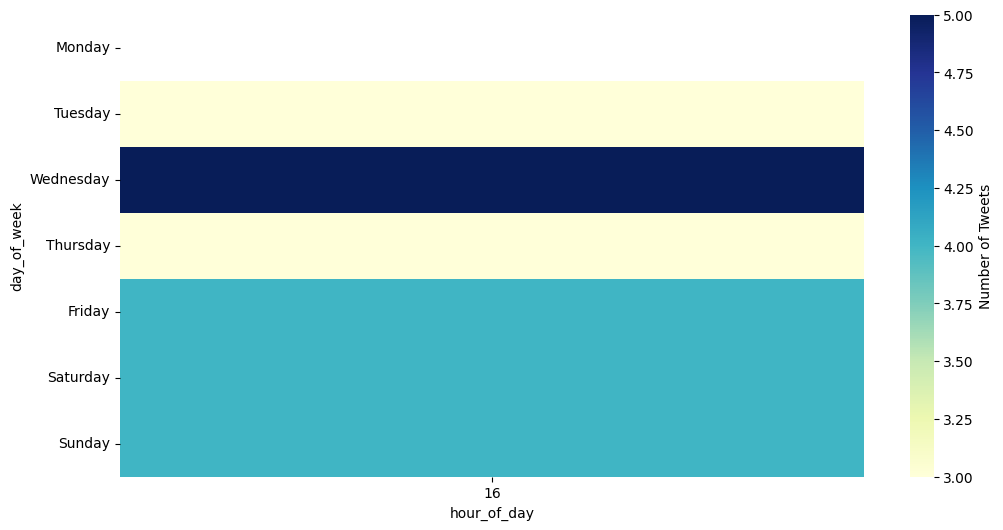

In [14]:
# Run the analysis

# 1. Count category mentions
counts_df = count_category_mentions(df)
print("Category Counts:")
print(counts_df)

# 2. Plot category distribution
plot_category_distribution(counts_df)

# 3. Plot trends over time
# Daily trend
plot_category_trends(df, freq='D')

# Weekly trend
plot_category_trends(df, freq='W')

# 4. Plot stacked area chart
plot_stacked_area_trends(df, freq='W')

# 5. Create daily pattern heatmaps
# Uncomment to run - creates one heatmap per category
plot_daily_heatmap(df)

In [17]:
from sklearn.metrics import jaccard_score
from itertools import combinations
import networkx as nx

In [18]:
# Define all categories
CATEGORIES = [
    'PRODUCT', 'PLACE', 'PRICE', 'PUBLICITY', 
    'POSTCONSUMPTION', 'PURPOSE', 'PARTNERSHIPS', 
    'PEOPLE', 'PLANET'
]

# Create sample data (replace this with your actual classified data)
np.random.seed(42)
n_samples = 500

# Create the sample DataFrame with some realistic patterns
sample_data = {'id': range(1, n_samples + 1)}

# Generate correlated data to simulate realistic co-occurrences
base_product = np.random.binomial(1, 0.4, n_samples)  # Base rate for PRODUCT
base_price = np.random.binomial(1, 0.3, n_samples)    # Base rate for PRICE
base_purpose = np.random.binomial(1, 0.2, n_samples)  # Base rate for PURPOSE

# Add PRODUCT with base rate
sample_data['PRODUCT'] = base_product

# Add PRICE with correlation to PRODUCT (people who mention products often mention price)
sample_data['PRICE'] = np.where(
    base_product == 1,
    np.random.binomial(1, 0.7, n_samples),  # 70% chance of mentioning PRICE if PRODUCT is mentioned
    np.random.binomial(1, 0.1, n_samples)   # 10% chance otherwise
)

# Add PLACE with moderate base rate
sample_data['PLACE'] = np.random.binomial(1, 0.25, n_samples)

# Add PUBLICITY with some correlation to PRODUCT
sample_data['PUBLICITY'] = np.where(
    base_product == 1,
    np.random.binomial(1, 0.4, n_samples),  # 40% chance if PRODUCT is mentioned
    np.random.binomial(1, 0.15, n_samples)  # 15% chance otherwise
)

# Add POSTCONSUMPTION with strong correlation to PRODUCT
sample_data['POSTCONSUMPTION'] = np.where(
    base_product == 1,
    np.random.binomial(1, 0.6, n_samples),  # 60% chance if PRODUCT is mentioned
    np.random.binomial(1, 0.05, n_samples)  # 5% chance otherwise
)

# Add PURPOSE
sample_data['PURPOSE'] = base_purpose

# Add PARTNERSHIPS with correlation to PURPOSE
sample_data['PARTNERSHIPS'] = np.where(
    base_purpose == 1,
    np.random.binomial(1, 0.5, n_samples),  # 50% chance if PURPOSE is mentioned
    np.random.binomial(1, 0.1, n_samples)   # 10% chance otherwise
)

# Add PEOPLE with correlation to PURPOSE
sample_data['PEOPLE'] = np.where(
    base_purpose == 1,
    np.random.binomial(1, 0.6, n_samples),  # 60% chance if PURPOSE is mentioned
    np.random.binomial(1, 0.15, n_samples)  # 15% chance otherwise
)

# Add PLANET with correlation to PURPOSE and PEOPLE
sample_data['PLANET'] = np.where(
    (base_purpose == 1) | (sample_data['PEOPLE'] == 1),
    np.random.binomial(1, 0.5, n_samples),  # 50% chance if PURPOSE or PEOPLE is mentioned
    np.random.binomial(1, 0.05, n_samples)  # 5% chance otherwise
)

# Create DataFrame
df = pd.DataFrame(sample_data)

# Let's add some mock tweet text for context
tweet_templates = [
    "The {product} at {brand} is {quality}.",
    "Why is {brand} so {price_adj} for {product}?",
    "I love how {brand} is committed to {purpose}.",
    "Just visited the {brand} store at {location}.",
    "The new partnership between {brand} and {partner} is {opinion}.",
    "After using {brand} {product}, I feel {feeling}.",
    "{brand}'s advertising campaign is {opinion}.",
    "{brand} should really improve their {aspect}.",
    "Does anyone know if {brand} recycles their {packaging}?",
    "The staff at {brand} {location} were {service_quality}."
]

brands = ["Starbucks", "Apple", "Nike", "Amazon", "Tesla", "Microsoft"]
products = ["coffee", "latte", "cappuccino", "espresso", "cold brew", "tea", "pastry"]
quality_terms = ["amazing", "terrible", "mediocre", "outstanding", "disappointing"]
price_adj = ["expensive", "overpriced", "affordable", "cheap", "worth it", "not worth it"]
purposes = ["sustainability", "fair trade", "community support", "diversity", "environmental goals"]
locations = ["downtown", "mall", "airport", "university campus", "train station"]
partners = ["local farmers", "tech companies", "environmental orgs", "community groups"]
opinions = ["great", "terrible", "interesting", "problematic", "innovative"]
feelings = ["satisfied", "disappointed", "happy", "frustrated"]
aspects = ["customer service", "product quality", "store cleanliness", "app", "website"]
packaging = ["cups", "containers", "bags", "packaging"]
service_quality = ["helpful", "rude", "professional", "friendly", "knowledgeable"]

# Generate mock tweets
import random
tweets = []
for _ in range(n_samples):
    template = random.choice(tweet_templates)
    tweet = template.format(
        brand=random.choice(brands),
        product=random.choice(products),
        quality=random.choice(quality_terms),
        price_adj=random.choice(price_adj),
        purpose=random.choice(purposes),
        location=random.choice(locations),
        partner=random.choice(partners),
        opinion=random.choice(opinions),
        feeling=random.choice(feelings),
        aspect=random.choice(aspects),
        packaging=random.choice(packaging),
        service_quality=random.choice(service_quality)
    )
    tweets.append(tweet)

df['tweet'] = tweets

# Now let's implement the co-occurrence analysis

def analyze_category_correlations(dataframe):
    """
    Calculate correlation matrix between categories
    """
    # Calculate correlation matrix (Pearson correlation)
    correlation_matrix = dataframe[CATEGORIES].corr()
    
    # Plot the correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Create mask for upper triangle
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
    
    plt.title('Correlation Between Categories', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

def calculate_jaccard_similarity(dataframe):
    """
    Calculate Jaccard similarity between all pairs of categories
    (Jaccard measures similarity between finite sample sets)
    """
    jaccard_matrix = pd.DataFrame(index=CATEGORIES, columns=CATEGORIES)
    
    for cat1 in CATEGORIES:
        for cat2 in CATEGORIES:
            # Skip calculation for the same category
            if cat1 == cat2:
                jaccard_matrix.loc[cat1, cat2] = 1.0
            else:
                # Calculate Jaccard similarity
                jaccard_matrix.loc[cat1, cat2] = jaccard_score(
                    dataframe[cat1], dataframe[cat2], average='binary'
                )
    
    # Plot the Jaccard similarity heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(jaccard_matrix, dtype=bool))  # Create mask for upper triangle
    
    # Generate a custom diverging colormap
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    
    # Draw the heatmap with the mask
    sns.heatmap(jaccard_matrix, mask=mask, cmap=cmap, vmax=1, vmin=0, center=0.5,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
    
    plt.title('Jaccard Similarity Between Categories', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return jaccard_matrix

def identify_top_cooccurrences(dataframe):
    """
    Find the most common category pairs and provide examples
    """
    # Create a dictionary to store co-occurrence counts
    cooccurrence_counts = {}
    
    # Calculate co-occurrence for each pair of categories
    for i, cat1 in enumerate(CATEGORIES):
        for cat2 in CATEGORIES[i+1:]:  # Start from i+1 to avoid duplicates
            # Count tweets where both categories appear
            both_present = ((dataframe[cat1] == 1) & (dataframe[cat2] == 1)).sum()
            cooccurrence_counts[(cat1, cat2)] = both_present
    
    # Convert to DataFrame for better display
    cooccurrence_df = pd.DataFrame([
        {'Category 1': cat1, 'Category 2': cat2, 'Co-occurrences': count, 
         'Percentage': (count / len(dataframe)) * 100}
        for (cat1, cat2), count in cooccurrence_counts.items()
    ])
    
    # Sort by number of co-occurrences in descending order
    cooccurrence_df = cooccurrence_df.sort_values('Co-occurrences', ascending=False)
    
    print("\nTop Category Co-occurrences:")
    print(cooccurrence_df.head(10))
    
    # Find examples for top 3 co-occurring pairs
    print("\nExamples of top co-occurring categories:")
    for i, row in cooccurrence_df.head(3).iterrows():
        cat1, cat2 = row['Category 1'], row['Category 2']
        
        # Find tweets with both categories
        examples = dataframe[(dataframe[cat1] == 1) & (dataframe[cat2] == 1)]['tweet'].sample(min(3, row['Co-occurrences']))
        
        print(f"\n{cat1} + {cat2} Examples:")
        for j, example in enumerate(examples, 1):
            print(f"  {j}. {example}")
    
    return cooccurrence_df

def create_network_graph(jaccard_matrix, threshold=0.2):
    """
    Create a network graph showing relationships between categories
    """
    # Create a new graph
    G = nx.Graph()
    
    # Add nodes (categories)
    for category in CATEGORIES:
        G.add_node(category)
    
    # Add edges based on Jaccard similarity above threshold
    for cat1 in CATEGORIES:
        for cat2 in CATEGORIES:
            if cat1 != cat2 and jaccard_matrix.loc[cat1, cat2] >= threshold:
                G.add_edge(cat1, cat2, weight=jaccard_matrix.loc[cat1, cat2])
    
    # Plot the graph
    plt.figure(figsize=(12, 12))
    
    # Customize node appearance based on frequency
    category_counts = df[CATEGORIES].sum()
    node_sizes = [category_counts[cat] * 20 for cat in CATEGORIES]
    
    # Create position layout
    pos = nx.spring_layout(G, k=0.3, seed=42)
    
    # Draw the graph
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.8)
    
    # Draw edges with varying thickness based on weight
    edge_widths = [G[u][v]['weight'] * 10 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color='gray')
    
    # Add labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    plt.title(f'Category Relationships (Jaccard Similarity >= {threshold})', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return G

def analyze_conditional_probabilities(dataframe):
    """
    Calculate conditional probabilities between categories
    """
    conditional_probs = pd.DataFrame(index=CATEGORIES, columns=CATEGORIES)
    
    for cat1 in CATEGORIES:
        for cat2 in CATEGORIES:
            # Calculate P(cat2 | cat1) - probability of cat2 given cat1
            # This is: count of tweets with both categories / count of tweets with cat1
            tweets_with_cat1 = dataframe[cat1].sum()
            
            if tweets_with_cat1 > 0:
                tweets_with_both = ((dataframe[cat1] == 1) & (dataframe[cat2] == 1)).sum()
                conditional_probs.loc[cat1, cat2] = tweets_with_both / tweets_with_cat1
            else:
                conditional_probs.loc[cat1, cat2] = 0
    
    # Plot the conditional probability heatmap
    plt.figure(figsize=(14, 12))
    
    # Generate a custom colormap
    cmap = sns.color_palette("YlOrRd", as_cmap=True)
    
    # Draw the heatmap
    sns.heatmap(conditional_probs, cmap=cmap, vmax=1, vmin=0, 
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
    
    plt.title('Conditional Probability P(Column | Row)', fontsize=16)
    plt.xlabel('Category that co-occurs', fontsize=14)
    plt.ylabel('Given this category appears', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    return conditional_probs

Running co-occurrence analysis...

1. Correlation Matrix Analysis


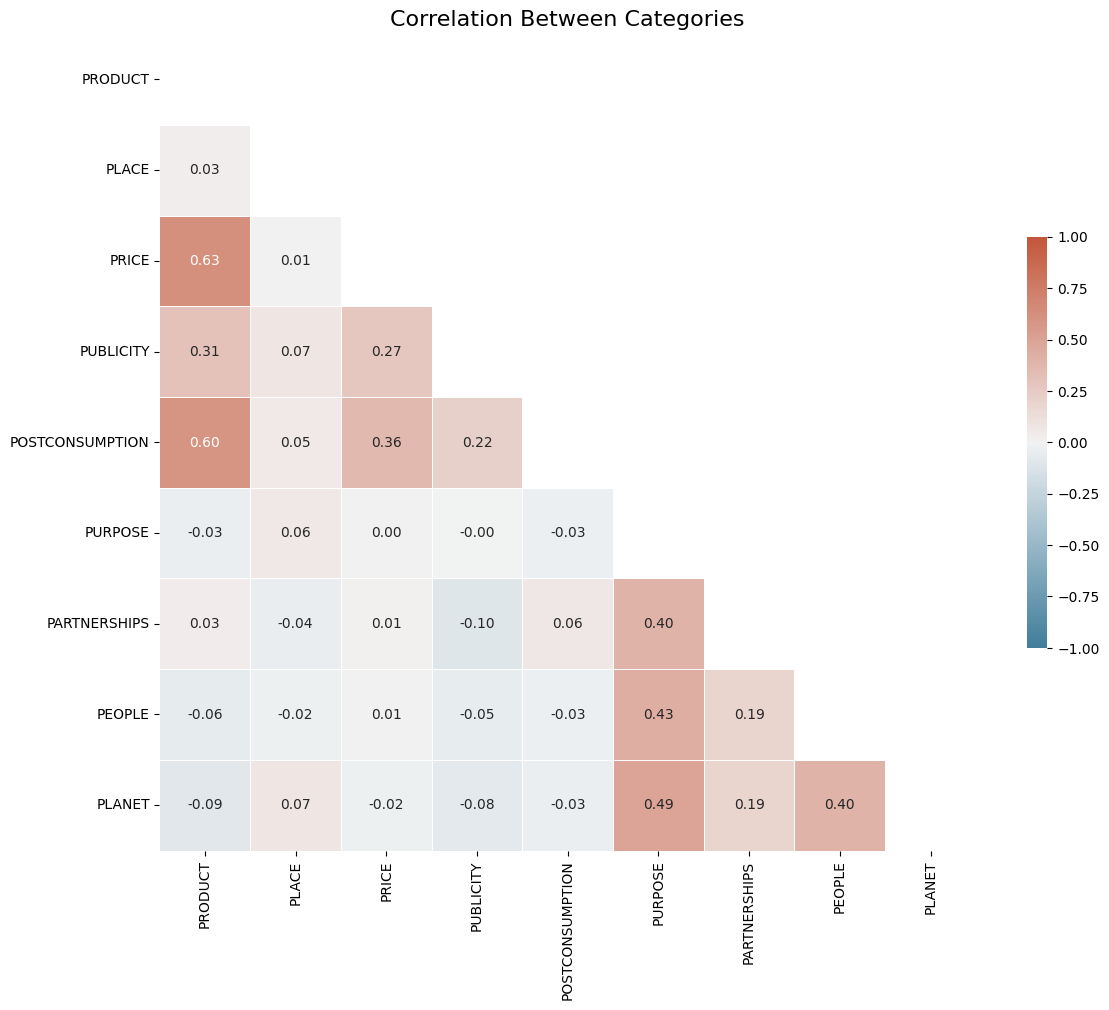


3. Top Co-occurrences Analysis

Top Category Co-occurrences:
   Category 1       Category 2  Co-occurrences  Percentage
1     PRODUCT            PRICE             143        28.6
3     PRODUCT  POSTCONSUMPTION             127        25.4
16      PRICE  POSTCONSUMPTION              88        17.6
2     PRODUCT        PUBLICITY              81        16.2
31    PURPOSE           PEOPLE              70        14.0
15      PRICE        PUBLICITY              67        13.4
32    PURPOSE           PLANET              65        13.0
35     PEOPLE           PLANET              64        12.8
0     PRODUCT            PLACE              60        12.0
21  PUBLICITY  POSTCONSUMPTION              55        11.0

Examples of top co-occurring categories:

PRODUCT + PRICE Examples:
  1. Just visited the Nike store at university campus.
  2. I love how Amazon is committed to community support.
  3. The new partnership between Apple and tech companies is problematic.

PRODUCT + POSTCONSUMPTION Exampl

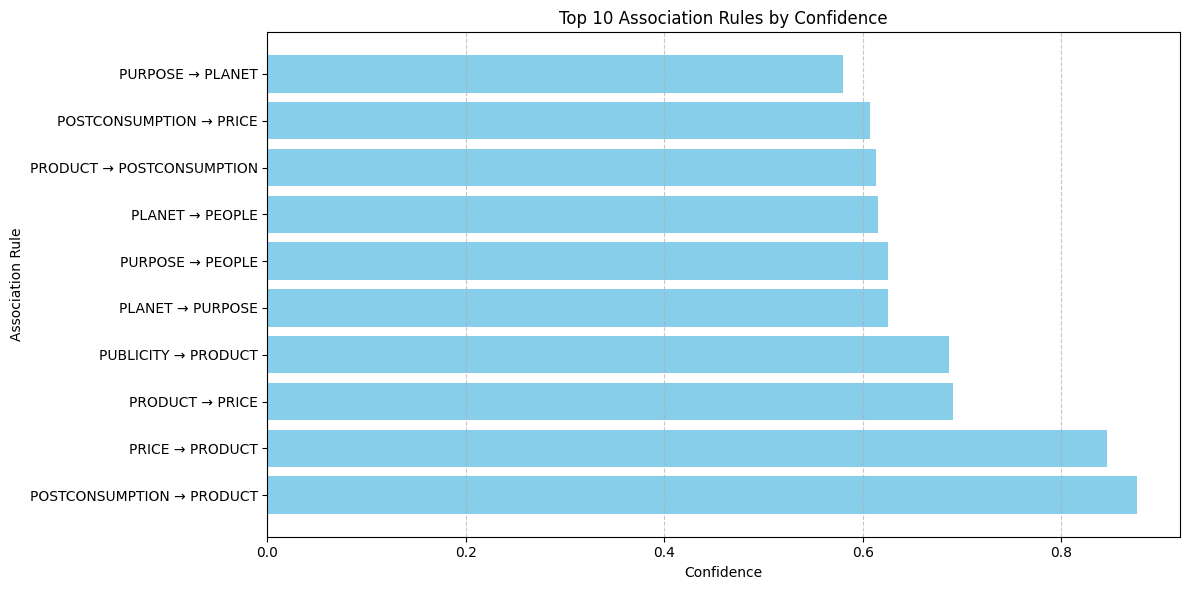

In [22]:
# Run the analyses
print("Running co-occurrence analysis...\n")

# 1. Calculate correlation matrix
print("1. Correlation Matrix Analysis")
corr_matrix = analyze_category_correlations(df)

# 2. Calculate Jaccard similarity
# print("\n2. Jaccard Similarity Analysis")
# jaccard_matrix = calculate_jaccard_similarity(df)

# 3. Identify top co-occurrences with examples
print("\n3. Top Co-occurrences Analysis")
cooccurrence_df = identify_top_cooccurrences(df)

# 4. Create network graph
# print("\n4. Network Graph Analysis")
# G = create_network_graph(jaccard_matrix, threshold=0.2)

# 5. Analyze conditional probabilities
# print("\n5. Conditional Probability Analysis")
# cond_probs = analyze_conditional_probabilities(df)

# 6. Association rules (simplified version)
def find_association_rules(dataframe, min_support=0.05, min_confidence=0.3):
    """
    Find simple association rules between categories
    """
    print("\n6. Association Rules Analysis (simplified)")
    print(f"Finding rules with minimum support {min_support} and confidence {min_confidence}")
    
    n_samples = len(dataframe)
    rules = []
    
    # Check all possible X → Y rules
    for cat1 in CATEGORIES:
        for cat2 in CATEGORIES:
            if cat1 != cat2:
                # Calculate support and confidence
                support_X = dataframe[cat1].sum() / n_samples
                support_XY = ((dataframe[cat1] == 1) & (dataframe[cat2] == 1)).sum() / n_samples
                
                if support_XY >= min_support:
                    confidence = support_XY / support_X
                    
                    if confidence >= min_confidence:
                        lift = confidence / (dataframe[cat2].sum() / n_samples)
                        rules.append({
                            'antecedent': cat1,
                            'consequent': cat2,
                            'support': support_XY,
                            'confidence': confidence,
                            'lift': lift
                        })
    
    # Convert to DataFrame and sort
    rules_df = pd.DataFrame(rules)
    if not rules_df.empty:
        rules_df = rules_df.sort_values('confidence', ascending=False)
        
        print("\nTop Association Rules:")
        pd.set_option('display.float_format', '{:.2f}'.format)
        print(rules_df.head(10))
        
        # Create a bar chart for top rules
        plt.figure(figsize=(12, 6))
        top_rules = rules_df.head(10)
        
        # Create rule labels
        rule_labels = [f"{row['antecedent']} → {row['consequent']}" for _, row in top_rules.iterrows()]
        
        # Plot the confidence values
        plt.barh(rule_labels, top_rules['confidence'], color='skyblue')
        plt.xlabel('Confidence')
        plt.ylabel('Association Rule')
        plt.title('Top 10 Association Rules by Confidence')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        return rules_df
    else:
        print("No rules found meeting the minimum support and confidence criteria.")
        return pd.DataFrame()

# Run association rules analysis
rules_df = find_association_rules(df)